In [ ]:
!pip install pyspark


BIG DATA ANALYSIS USING PYSPARK


Total Records: 7242696
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)

Number of Partitions 8


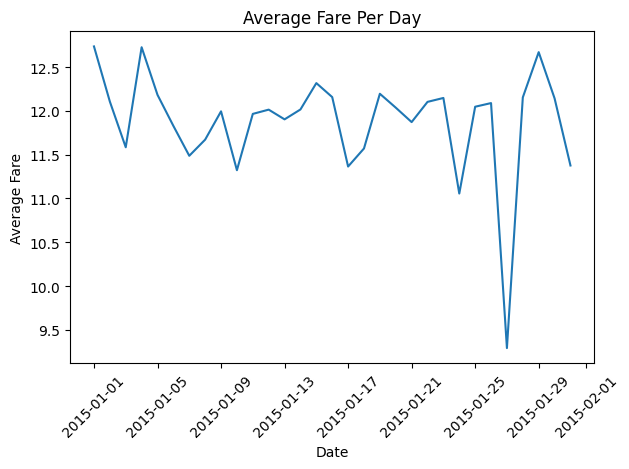

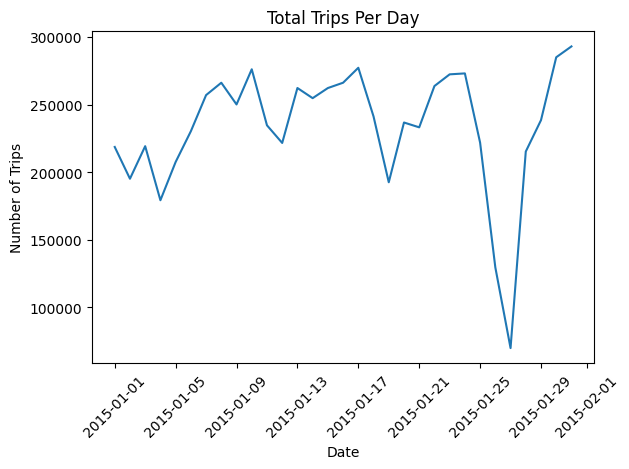

In [7]:
# SETUP

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg , count , to_date
import matplotlib.pyplot as plt

spark = SparkSession.builder \
.appName("BIG DATA ANALYTICS") \
.getOrCreate()

# LOAD LARGE DATASET

data="/content/yellow_tripdata_2015-01.csv"
df=spark.read.csv(data,header=True,inferSchema=True)

print("Total Records:" , df.count())
df.printSchema()

# DATA CLEANING

clean_df=df.dropna(subset=['trip_distance' , 'fare_amount','tpep_pickup_datetime'])
clean_df=clean_df.withColumn(
 'pickup_date', to_date(col('tpep_pickup_datetime'))
 )

# 4 BIG DATA ANALYSIS

# 4.1 average fare per day
avg_fare_per_day= clean_df.groupBy('pickup_date') \
.agg(avg('fare_amount').alias('avg_fare')) \
.orderBy('pickup_date')

# 4.2 total trips per day
tot_trips_per_day = clean_df.groupBy('pickup_date') \
.agg(count('*').alias('total_trips')) \

trips_per_day = tot_trips_per_day.orderBy("pickup_date")

# 5 SCALABILITY DEMONSTRATION

repartitioned_df=clean_df.repartition(8)
print("Number of Partitions", repartitioned_df.rdd.getNumPartitions())

# 6 CONVERT TO PANDAS FOR VISUALIZATION

avg_fare_pd=avg_fare_per_day.toPandas()
tot_trips_pd=trips_per_day.toPandas()

# 7 VISUALIZATIONS

#7.1 Avg_fare_per_day
plt.figure()
plt.plot(avg_fare_pd['pickup_date'], avg_fare_pd['avg_fare'])
plt.title('Average Fare Per Day')
plt.xlabel('Date')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#7.2 Trips per day
plt.figure()
plt.plot(tot_trips_pd['pickup_date'],
         tot_trips_pd['total_trips'])

plt.title('Total Trips Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

spark.stop()

INSIGHTS:
1. Trip volume shows clear daily fluctuations, indicating peak and off-peak demand.
2. Average fare per day remains relatively stable across time.
3. Distributed processing enables fast aggregation even on large datasets.
4. Repartitioning improves parallelism and scalability.


SCALABILITY:
- Same code works for thousands or millions of rows
- PySpark processes data in parallel across partitions


TOOLS USED:
- PySpark
- Spark SQL
- Matplotlib (for visualization)